In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

In [2]:
from google.colab import drive  
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/cats_and_dogs_filtered'

In [4]:
# Training folder path
Train_path='/content/drive/MyDrive/cats_and_dogs_filtered/train' 

# Testing folder path
Test_path='/content/drive/MyDrive/cats_and_dogs_filtered/validation' 

In [5]:
model = tf.keras.Sequential()#Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
    #model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(64, 64, 3))
model.add(MaxPooling2D(pool_size=(2,2)))

    
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
  
    
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

  
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2)) ## 
    
    
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3)) ##
model.add(Dense(2, activation = 'softmax'))

# New Section

In [6]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/cats_and_dogs_filtered/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


Found 2000 images belonging to 2 classes.


In [8]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/cats_and_dogs_filtered/validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [9]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [10]:
history = model.fit(training_set, validation_data = test_set, batch_size = 32, epochs = 25, verbose = 1)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


63/63 [==============================] - 1406s 22s/step - loss: 0.6951 - accuracy: 0.4960 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/25
63/63 [==============================] - 14s 224ms/step - loss: 0.6916 - accuracy: 0.5270 - val_loss: 0.6980 - val_accuracy: 0.5000
Epoch 3/25
63/63 [==============================] - 13s 206ms/step - loss: 0.6845 - accuracy: 0.5660 - val_loss: 0.6533 - val_accuracy: 0.6160
Epoch 4/25
63/63 [==============================] - 13s 205ms/step - loss: 0.6700 - accuracy: 0.5705 - val_loss: 0.6718 - val_accuracy: 0.6010
Epoch 5/25
63/63 [==============================] - 13s 201ms/step - loss: 0.6730 - accuracy: 0.5665 - val_loss: 0.6596 - val_accuracy: 0.5990
Epoch 6/25
63/63 [==============================] - 13s 203ms/step - loss: 0.6589 - accuracy: 0.6020 - val_loss: 0.6633 - val_accuracy: 0.6280
Epoch 7/25
63/63 [==============================] - 13s 201ms/step - loss: 0.6547 - accuracy: 0.6255 - val_loss: 0.6721 - val_accuracy: 0.5890
Epoch 8/25

In [11]:
import matplotlib.pyplot as plt

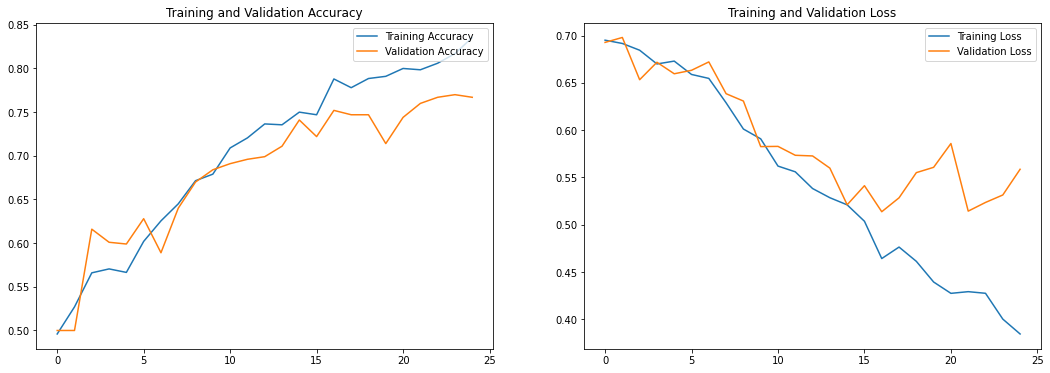

In [12]:
# Plot accuracy and  loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['accuracy']))

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(history.history['accuracy'])), acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
from tensorflow.keras.models import load_model
model.save('model_CNN.h5')

In [14]:
 import numpy as np

In [15]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [16]:
model=load_model('model_CNN.h5')

dog


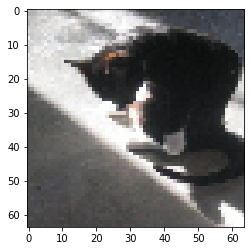

In [17]:
class_dict = {0: "dog", 1: "cat"}
test_img=image.load_img('/content/drive/MyDrive/cats_and_dogs_filtered/validation/cats/cat.2006.jpg',target_size=(64,64))

plt.imshow(test_img)

plt.grid(False)

test_img1 = np.expand_dims(test_img, axis=0)

pred = model.predict(test_img1)
pred = np.argmax(pred)
pred_class =class_dict[pred]
print(pred_class)